In [1]:
import numpy as np
import os, io
from io import BytesIO
import matplotlib as mpl
import matplotlib.pyplot as plt
import boto3
import pandas as pd
import json

In [2]:
import seaborn as sns
mpl.style.use("seaborn")


In [3]:
def compute_objective(sample, Q, b):
    numruns = sample.shape[0]
    obj = np.zeros(numruns)
    for i in range(numruns):
        x = sample[i]
        obj[i] = (x @ Q @ x) / 2 + b @ x
    return obj

In [3]:
def plot_abs_gap(dimensions, bandwidth):
    
    s3 = boto3.resource('s3')
    bucket_name = "amazon-braket-wugroup-us-east-1"
    fig, axs = plt.subplots(len(dimensions), sharex=True)
    
    num_instances = 50
    num_samples = 2
    x = np.arange(num_instances)
    width = 1 / (num_samples + 1)
    
    for i in range(len(dimensions)):
        dimension = dimensions[i]
        
        benchmark_name = f"QP-{dimension}d-{2 * bandwidth + 1}s"
        
        ipopt_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"ipopt_abs_gap.npy")))
        snopt_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"snopt_abs_gap.npy")))
        matlab_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"matlab_sqp_abs_gap.npy")))
        auglag_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"auglag_abs_gap.npy")))
        qaa_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleB_rez8_abs_gap.npy")))
        qhd_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qhd_rez8_abs_gap.npy")))

        axs[i].set_title(f"Dimension {dimension} Instances")
        axs[i].set_xlabel("Instance")
        
        labels = ['IPOPT', 'SNOPT', 'MATLAB', 'AL', 'QAA', 'QHD']
        axs[i].set_xticks(range(6), minor=labels)
        axs[i].bar(labels, [ipopt_obj, snopt_obj, matlab_obj, auglag_obj, qaa_obj, qhd_obj])

        '''if (i == 0):
            axs[i].legend((bar_ipopt, bar_qhd), \
                        ("IPOPT", "QHD"), \
                        bbox_to_anchor=(1,1))'''
    
    fig.text(-0.04, 0.5, 'Avg Abs Opt Gap (lower is better)', va='center', rotation='vertical')
    #xticks_pos = np.arange(0, num_instances, 5)
    #plt.setp(axs, xticks=xticks_pos + 0.5 * width, xticklabels=xticks_pos)
    
    for ax in axs:
        ax.label_outer()
    
    fig.tight_layout(h_pad=2)
    plt.show()
    #plt.savefig("avg_abs_gap.png")

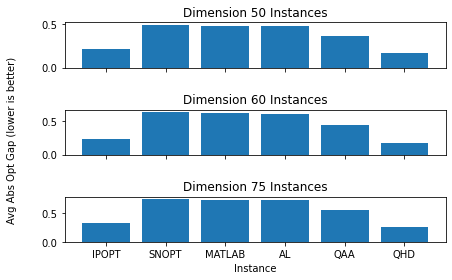

In [4]:
plot_abs_gap([50, 60, 75], 2)

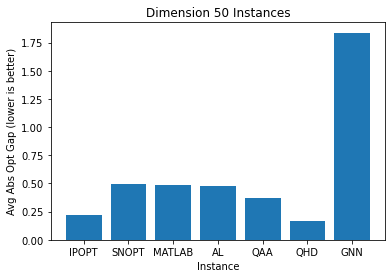

In [21]:
s3 = boto3.resource('s3')
bucket_name = "amazon-braket-wugroup-us-east-1"
dimension = 50
bandwidth = 2
num_instances = 50
num_samples = 2
x = np.arange(num_instances)
width = 1 / (num_samples + 1)


benchmark_name = f"QP-{dimension}d-{2 * bandwidth + 1}s"

ipopt_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"ipopt_abs_gap.npy")))
snopt_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"snopt_abs_gap.npy")))
matlab_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"matlab_sqp_abs_gap.npy")))
auglag_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"auglag_abs_gap.npy")))
qaa_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleB_rez8_abs_gap.npy")))
qhd_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qhd_rez8_abs_gap.npy")))
gnn_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"gnn_abs_gap.npy")))

plt.title(f"Dimension {dimension} Instances")
plt.xlabel("Instance")

labels = ['IPOPT', 'SNOPT', 'MATLAB', 'AL', 'QAA', 'QHD', 'GNN']
plt.xticks(range(7), labels=labels)
plt.bar(labels, [ipopt_obj, snopt_obj, matlab_obj, auglag_obj, qaa_obj, qhd_obj, gnn_obj])

'''if (i == 0):
    axs[i].legend((bar_ipopt, bar_qhd), \
                ("IPOPT", "QHD"), \
                bbox_to_anchor=(1,1))'''

plt.ylabel('Avg Abs Opt Gap (lower is better)')

plt.show()

In [5]:
def plot_success_prob(dimensions, bandwidth):
    
    s3 = boto3.resource('s3')
    bucket_name = "amazon-braket-wugroup-us-east-1"
    fig, axs = plt.subplots(len(dimensions), sharex=True)
    
    num_instances = 50
    num_samples = 2
    x = np.arange(num_instances)
    width = 1 / (num_samples + 1)
    
    for i in range(len(dimensions)):
        dimension = dimensions[i]
        
        benchmark_name = f"QP-{dimension}d-5s"
        
        ipopt_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"ipopt_success_prob.npy")))
        snopt_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"snopt_success_prob.npy")))
        matlab_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"matlab_sqp_success_prob.npy")))
        auglag_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"auglag_success_prob.npy")))
        qaa_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleB_rez8_success_prob.npy")))
        qhd_obj = np.mean(np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qhd_rez8_success_prob.npy")))

        axs[i].set_title(f"Dimension {dimension} Instances")
        axs[i].set_xlabel("Instance")
        
        labels = ['IPOPT', 'SNOPT', 'MATLAB', 'AL', 'QAA', 'QHD']
        axs[i].set_xticks(range(6), minor=labels)
        axs[i].bar(labels, [ipopt_obj, snopt_obj, matlab_obj, auglag_obj, qaa_obj, qhd_obj])

        '''if (i == 0):
            axs[i].legend((bar_ipopt, bar_qhd), \
                        ("IPOPT", "QHD"), \
                        bbox_to_anchor=(1,1))'''
    
    fig.text(-0.04, 0.5, 'Average Success Probability (higher is better)', va='center', rotation='vertical')
    #xticks_pos = np.arange(0, num_instances, 5)
    #plt.setp(axs, xticks=xticks_pos + 0.5 * width, xticklabels=xticks_pos)
    
    for ax in axs:
        ax.label_outer()
    
    fig.tight_layout(h_pad=2)
    plt.show()
    #plt.savefig("success_prob.png")

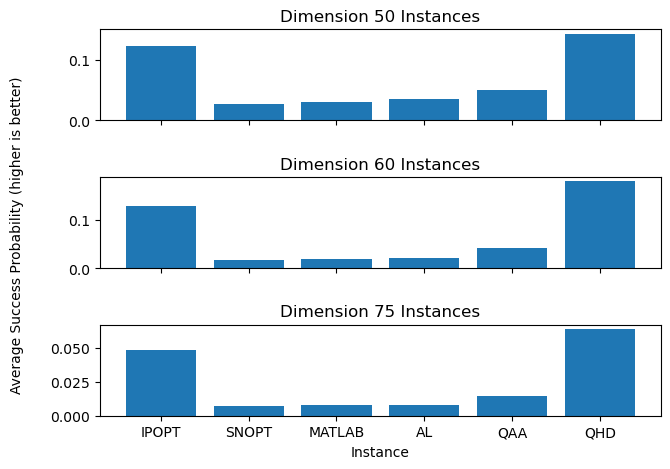

In [6]:
plot_success_prob([50, 60, 75], 2)

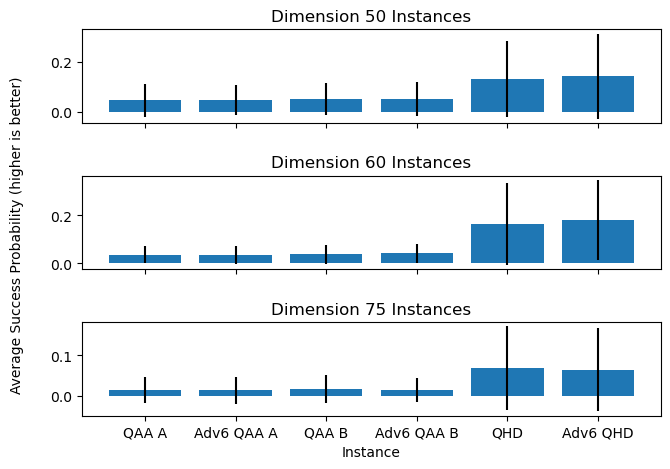

In [11]:
dimensions = [50, 60, 75]
bandwidth = 2

s3 = boto3.resource('s3')
bucket_name = "amazon-braket-wugroup-us-east-1"
fig, axs = plt.subplots(len(dimensions), sharex=True)

num_instances = 50
num_samples = 2
x = np.arange(num_instances)
width = 1 / (num_samples + 1)

for i in range(len(dimensions)):
    dimension = dimensions[i]

    benchmark_name = f"QP-{dimension}d-5s"

    qaa_obj_a = np.load(os.path.join("instances", benchmark_name, f"post_qaa_scheduleA_rez8_success_prob.npy"))
    adv6_qaa_obj_a = np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleA_rez8_success_prob.npy"))
    qaa_obj_b = np.load(os.path.join("instances", benchmark_name, f"post_qaa_scheduleB_rez8_success_prob.npy"))
    adv6_qaa_obj_b = np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleB_rez8_success_prob.npy"))
    qhd_obj = np.load(os.path.join("instances", benchmark_name, f"post_qhd_rez8_success_prob.npy"))
    adv6_qhd_obj = np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qhd_rez8_success_prob.npy"))

    axs[i].set_title(f"Dimension {dimension} Instances")
    axs[i].set_xlabel("Instance")

    labels = ['QAA A', 'Adv6 QAA A', 'QAA B', 'Adv6 QAA B', "QHD", "Adv6 QHD"]
    
    axs[i].set_xticks(range(6), minor=labels)
    axs[i].bar(labels, [np.mean(qaa_obj_a), np.mean(adv6_qaa_obj_a), np.mean(qaa_obj_b), np.mean(adv6_qaa_obj_b), np.mean(qhd_obj), np.mean(adv6_qhd_obj)],
                   yerr=[np.std(qaa_obj_a, ddof=1), np.std(adv6_qaa_obj_a, ddof=1), np.std(qaa_obj_b, ddof=1), np.std(adv6_qaa_obj_b, ddof=1), np.std(qhd_obj, ddof=1), np.std(adv6_qhd_obj, ddof=1)])


fig.text(-0.04, 0.5, 'Average Success Probability (higher is better)', va='center', rotation='vertical')
#xticks_pos = np.arange(0, num_instances, 5)
#plt.setp(axs, xticks=xticks_pos + 0.5 * width, xticklabels=xticks_pos)

for ax in axs:
    ax.label_outer()

fig.tight_layout(h_pad=2)
plt.show()
#plt.savefig("success_prob.png")

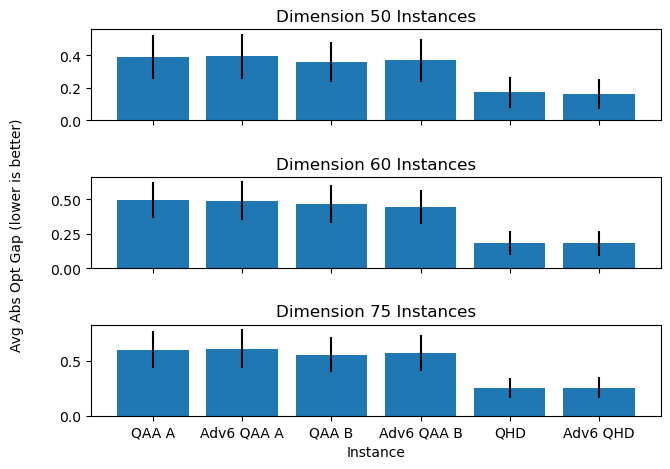

In [12]:
s3 = boto3.resource('s3')
bucket_name = "amazon-braket-wugroup-us-east-1"
fig, axs = plt.subplots(len(dimensions), sharex=True)

num_instances = 50
num_samples = 2
x = np.arange(num_instances)
width = 1 / (num_samples + 1)

for i in range(len(dimensions)):
    dimension = dimensions[i]

    benchmark_name = f"QP-{dimension}d-5s"

    qaa_obj_a = np.load(os.path.join("instances", benchmark_name, f"post_qaa_scheduleA_rez8_abs_gap.npy"))
    adv6_qaa_obj_a = np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleA_rez8_abs_gap.npy"))
    qaa_obj_b = np.load(os.path.join("instances", benchmark_name, f"post_qaa_scheduleB_rez8_abs_gap.npy"))
    adv6_qaa_obj_b = np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleB_rez8_abs_gap.npy"))
    qhd_obj = np.load(os.path.join("instances", benchmark_name, f"post_qhd_rez8_abs_gap.npy"))
    adv6_qhd_obj = np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qhd_rez8_abs_gap.npy"))

    axs[i].set_title(f"Dimension {dimension} Instances")
    axs[i].set_xlabel("Instance")

    labels = ['QAA A', 'Adv6 QAA A', 'QAA B', 'Adv6 QAA B', 'QHD', 'Adv6 QHD']
    axs[i].set_xticks(range(6), minor=labels)
    axs[i].bar(labels, [np.mean(qaa_obj_a), np.mean(adv6_qaa_obj_a), np.mean(qaa_obj_b), np.mean(adv6_qaa_obj_b), np.mean(qhd_obj), np.mean(adv6_qhd_obj)],
             yerr=[np.std(qaa_obj_a, ddof=1), np.std(adv6_qaa_obj_a, ddof=1), np.std(qaa_obj_b, ddof=1), np.std(adv6_qaa_obj_b, ddof=1), np.std(qhd_obj, ddof=1), np.std(adv6_qhd_obj, ddof=1)])


fig.text(-0.04, 0.5, 'Avg Abs Opt Gap (lower is better)', va='center', rotation='vertical')
#xticks_pos = np.arange(0, num_instances, 5)
#plt.setp(axs, xticks=xticks_pos + 0.5 * width, xticklabels=xticks_pos)

for ax in axs:
    ax.label_outer()

fig.tight_layout(h_pad=2)
plt.show()

In [12]:
def qp_eval(x, Q, b):
    return 0.5 * x @ Q @ x + b @ x

In [13]:
def get_samples(bucket_name, filename):
    res = boto3.client('s3').get_object(Bucket=bucket_name, Key=filename)
    bytes_ = io.BytesIO(res['Body'].read())
    return np.load(bytes_)

In [287]:
instance = 0
benchmark_name = f"QP-60d-5s-alt"

instance_filename = f"jiaqileng/qhd/{benchmark_name}/instance_{instance}/instance_{instance}.npy"
res = boto3.client('s3').get_object(Bucket=bucket_name, Key=instance_filename)
bytes_ = io.BytesIO(res['Body'].read())
Q = np.load(bytes_)
b = np.load(bytes_)
Q_c = np.load(bytes_)
b_c = np.load(bytes_)

In [ ]:
def save_data2(benchmark_name, num_instances, numruns, resolution, tol):
    
    bucket_name = "amazon-braket-wugroup-us-east-1"
    
    best_fval_gurobi = np.zeros(num_instances)

    methods = ["ipopt", f"post_advantage6_qhd_rez{resolution}"]
    
    for method in methods:
        
        success_prob = np.zeros(num_instances)
        mean_obj = np.zeros(num_instances)
        abs_gap = np.zeros(num_instances)
        
        for instance in range(num_instances):
            # Load instance data from S3
            instance_filename = f"jiaqileng/qhd/{benchmark_name}/instance_{instance}/instance_{instance}.npy"
            res = boto3.client('s3').get_object(Bucket=bucket_name, Key=instance_filename)
            bytes_ = io.BytesIO(res['Body'].read())
            Q = np.load(bytes_)
            b = np.load(bytes_)
            Q_c = np.load(bytes_)
            b_c = np.load(bytes_)

            # Load Gurobi data (ground truth)
            gurobi_filename = f"jiaqileng/qhd/{benchmark_name}/instance_{instance}/gurobi_solution_{instance}.npy"
            res = boto3.client('s3').get_object(Bucket=bucket_name, Key=gurobi_filename)
            bytes_ = io.BytesIO(res['Body'].read())
            x_best = np.load(bytes_)
            f_best = qp_eval(x_best, Q, b) 
        
            samples = get_samples(bucket_name, f"jiaqileng/qhd/{benchmark_name}/instance_{instance}/{method}_sample_{instance}.npy")
            
            obj = []
            for k in range(numruns):
                obj.append(qp_eval(samples[k], Q, b))
                
            success_prob[instance] = np.mean(np.abs(obj - f_best) <= tol)
            mean_obj[instance] = np.mean(obj)
            abs_gap[instance] = np.mean(obj - f_best)
        
        print(f"Method {method} finished.")
        path = os.path.join("instances", benchmark_name)
        if not os.path.exists(path):
            os.mkdir(path)
        np.save(os.path.join("instances", benchmark_name, f"{method}_success_prob.npy"), success_prob)
        np.save(os.path.join("instances", benchmark_name, f"{method}_mean_obj.npy"), mean_obj)
        np.save(os.path.join("instances", benchmark_name, f"{method}_abs_gap.npy"), abs_gap)

In [ ]:
save_data2("QP-60d-5s-alt", 50, 1000, 8, 1e-2)

In [17]:
def save_data(benchmark_name, num_instances, numruns, resolution, tol):
    print(benchmark_name)
    bucket_name = "amazon-braket-wugroup-us-east-1"
    
    best_fval_gurobi = np.zeros(num_instances)

    methods = ["ipopt", "snopt", "auglag", "matlab_sqp", f"post_advantage6_qaa_scheduleB_rez{resolution}", f"post_advantage6_qhd_rez{resolution}"]
    
    for method in methods:
        
        success_prob = np.zeros(num_instances)
        mean_obj = np.zeros(num_instances)
        abs_gap = np.zeros(num_instances)
        
        for instance in range(num_instances):
            # Load instance data from S3
            instance_filename = f"jiaqileng/qhd/{benchmark_name}/instance_{instance}/instance_{instance}.npy"
            res = boto3.client('s3').get_object(Bucket=bucket_name, Key=instance_filename)
            bytes_ = io.BytesIO(res['Body'].read())
            Q = np.load(bytes_)
            b = np.load(bytes_)
            Q_c = np.load(bytes_)
            b_c = np.load(bytes_)

            # Load Gurobi data (ground truth)
            gurobi_filename = f"jiaqileng/qhd/{benchmark_name}/instance_{instance}/gurobi_solution_{instance}.npy"
            res = boto3.client('s3').get_object(Bucket=bucket_name, Key=gurobi_filename)
            bytes_ = io.BytesIO(res['Body'].read())
            x_best = np.load(bytes_)
            f_best = qp_eval(x_best, Q, b) 
        
            samples = get_samples(bucket_name, f"jiaqileng/qhd/{benchmark_name}/instance_{instance}/{method}_sample_{instance}.npy")
            
            obj = []
            for k in range(numruns):
                obj.append(qp_eval(samples[k], Q, b))
                
            success_prob[instance] = np.mean(np.abs(obj - f_best) <= tol)
            mean_obj[instance] = np.mean(obj)
            abs_gap[instance] = np.mean(obj - f_best)
        
        print(f"Method {method} finished.")
        path = os.path.join("instances", benchmark_name)
        if not os.path.exists(path):
            os.mkdir(path)
            
        np.save(os.path.join("instances", benchmark_name, f"{method}_success_prob.npy"), success_prob)
        np.save(os.path.join("instances", benchmark_name, f"{method}_mean_obj.npy"), mean_obj)
        np.save(os.path.join("instances", benchmark_name, f"{method}_abs_gap.npy"), abs_gap)

In [18]:
save_data("QP-50d-5s", 50, 1000, 8, 1e-2)
save_data("QP-60d-5s-alt", 50, 1000, 8, 1e-2)
save_data("QP-75d-5s", 50, 1000, 8, 1e-2)

QP-50d-5s
Method ipopt finished.
Method snopt finished.
Method auglag finished.
Method matlab_sqp finished.
Method post_advantage6_qaa_scheduleB_rez8 finished.
Method post_advantage6_qhd_rez8 finished.
QP-60d-5s-alt
Method ipopt finished.
Method snopt finished.
Method auglag finished.
Method matlab_sqp finished.
Method post_advantage6_qaa_scheduleB_rez8 finished.
Method post_advantage6_qhd_rez8 finished.
QP-75d-5s
Method ipopt finished.
Method snopt finished.
Method auglag finished.
Method matlab_sqp finished.
Method post_advantage6_qaa_scheduleB_rez8 finished.
Method post_advantage6_qhd_rez8 finished.


In [16]:
benchmark_names = ["QP-50d-5s", "QP-60d-5s-alt", "QP-75d-5s"]

def print_qubit_count(benchmark_name):
    s3 = boto3.resource('s3')
    bucket_name = "amazon-braket-wugroup-us-east-1"
    
    print(benchmark_name)
    methods = ["qaa", "qhd"]
    for method in methods:
        filename = f"jiaqileng/qhd/{benchmark_name}/config/advantage6_{method}_rez8_embedding.json"
        content_object = s3.Object(f"amazon-braket-wugroup-us-east-1", filename)
        file_content = content_object.get()['Body'].read().decode('utf-8')
        data = json.loads(file_content)
        print(f"Logical qubit count for {method}:", len(list(data.keys())))
        
        flattened = list()
        for sublist in list(data.values()):
            flattened.extend(sublist)
        print(f"Physical qubit count for {method}:", len(flattened))

for benchmark_name in benchmark_names:
    print_qubit_count(benchmark_name)

QP-50d-5s
Logical qubit count for qaa: 200
Physical qubit count for qaa: 662
Logical qubit count for qhd: 400
Physical qubit count for qhd: 2630
QP-60d-5s-alt
Logical qubit count for qaa: 240
Physical qubit count for qaa: 834
Logical qubit count for qhd: 480
Physical qubit count for qhd: 3276
QP-75d-5s
Logical qubit count for qaa: 300
Physical qubit count for qaa: 1047
Logical qubit count for qhd: 600
Physical qubit count for qhd: 4064


### Success Probability

In [10]:
benchmark_name = "QP-50d-5s"
# benchmark_name = "QP-60d-5s"
# benchmark_name = "QP-75d-5s"


def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def max_values(data):
    extrema = data != data.max()
    bolded = data.apply(lambda x : f"\cellcolor[HTML]{{EEEEEE}} \\textbf{{{x:.3f}}}")
    formatted = data.apply(lambda x : f"{x:.3f}")
    return formatted.where(extrema, bolded)


tab_prob = pd.DataFrame(
    {
        "AL/GD": np.load(os.path.join("instances", benchmark_name, f"auglag_success_prob.npy")),
        "IPOPT": np.load(os.path.join("instances", benchmark_name, f"ipopt_success_prob.npy")),
        "SNOPT": np.load(os.path.join("instances", benchmark_name, f"snopt_success_prob.npy")),
        "MATLAB": np.load(os.path.join("instances", benchmark_name, f"matlab_sqp_success_prob.npy")),
        "QAA": np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleB_rez8_success_prob.npy")),
        "QHD": np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qhd_rez8_success_prob.npy")),
        #"QHD (SGD)": np.load(os.path.join("instances", benchmark_name, f"post_sgd_qhd_rez8_success_prob.npy")),
    }
)

tab_prob.style.apply(highlight_max, props='font-weight:bold', axis=1)
print(tab_prob.apply(lambda data : max_values(data),axis=1).to_latex(column_format='c|ccccccc', escape=False))

\begin{tabular}{c|ccccccc}
\toprule
{} &  AL/GD &                                    IPOPT &  SNOPT & MATLAB &    QAA &                                      QHD \\
\midrule
0  &  0.034 &                                    0.155 &  0.036 &  0.049 &  0.035 &  \cellcolor[HTML]{EEEEEE} \textbf{0.343} \\
1  &  0.001 &                                    0.020 &  0.000 &  0.000 &  0.002 &  \cellcolor[HTML]{EEEEEE} \textbf{0.037} \\
2  &  0.006 &  \cellcolor[HTML]{EEEEEE} \textbf{0.024} &  0.003 &  0.002 &  0.018 &                                    0.011 \\
3  &  0.043 &                                    0.169 &  0.023 &  0.027 &  0.111 &  \cellcolor[HTML]{EEEEEE} \textbf{0.198} \\
4  &  0.005 &  \cellcolor[HTML]{EEEEEE} \textbf{0.025} &  0.002 &  0.004 &  0.005 &                                    0.009 \\
5  &  0.023 &                                    0.031 &  0.023 &  0.025 &  0.029 &  \cellcolor[HTML]{EEEEEE} \textbf{0.049} \\
6  &  0.010 &                                    0.076 &  0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


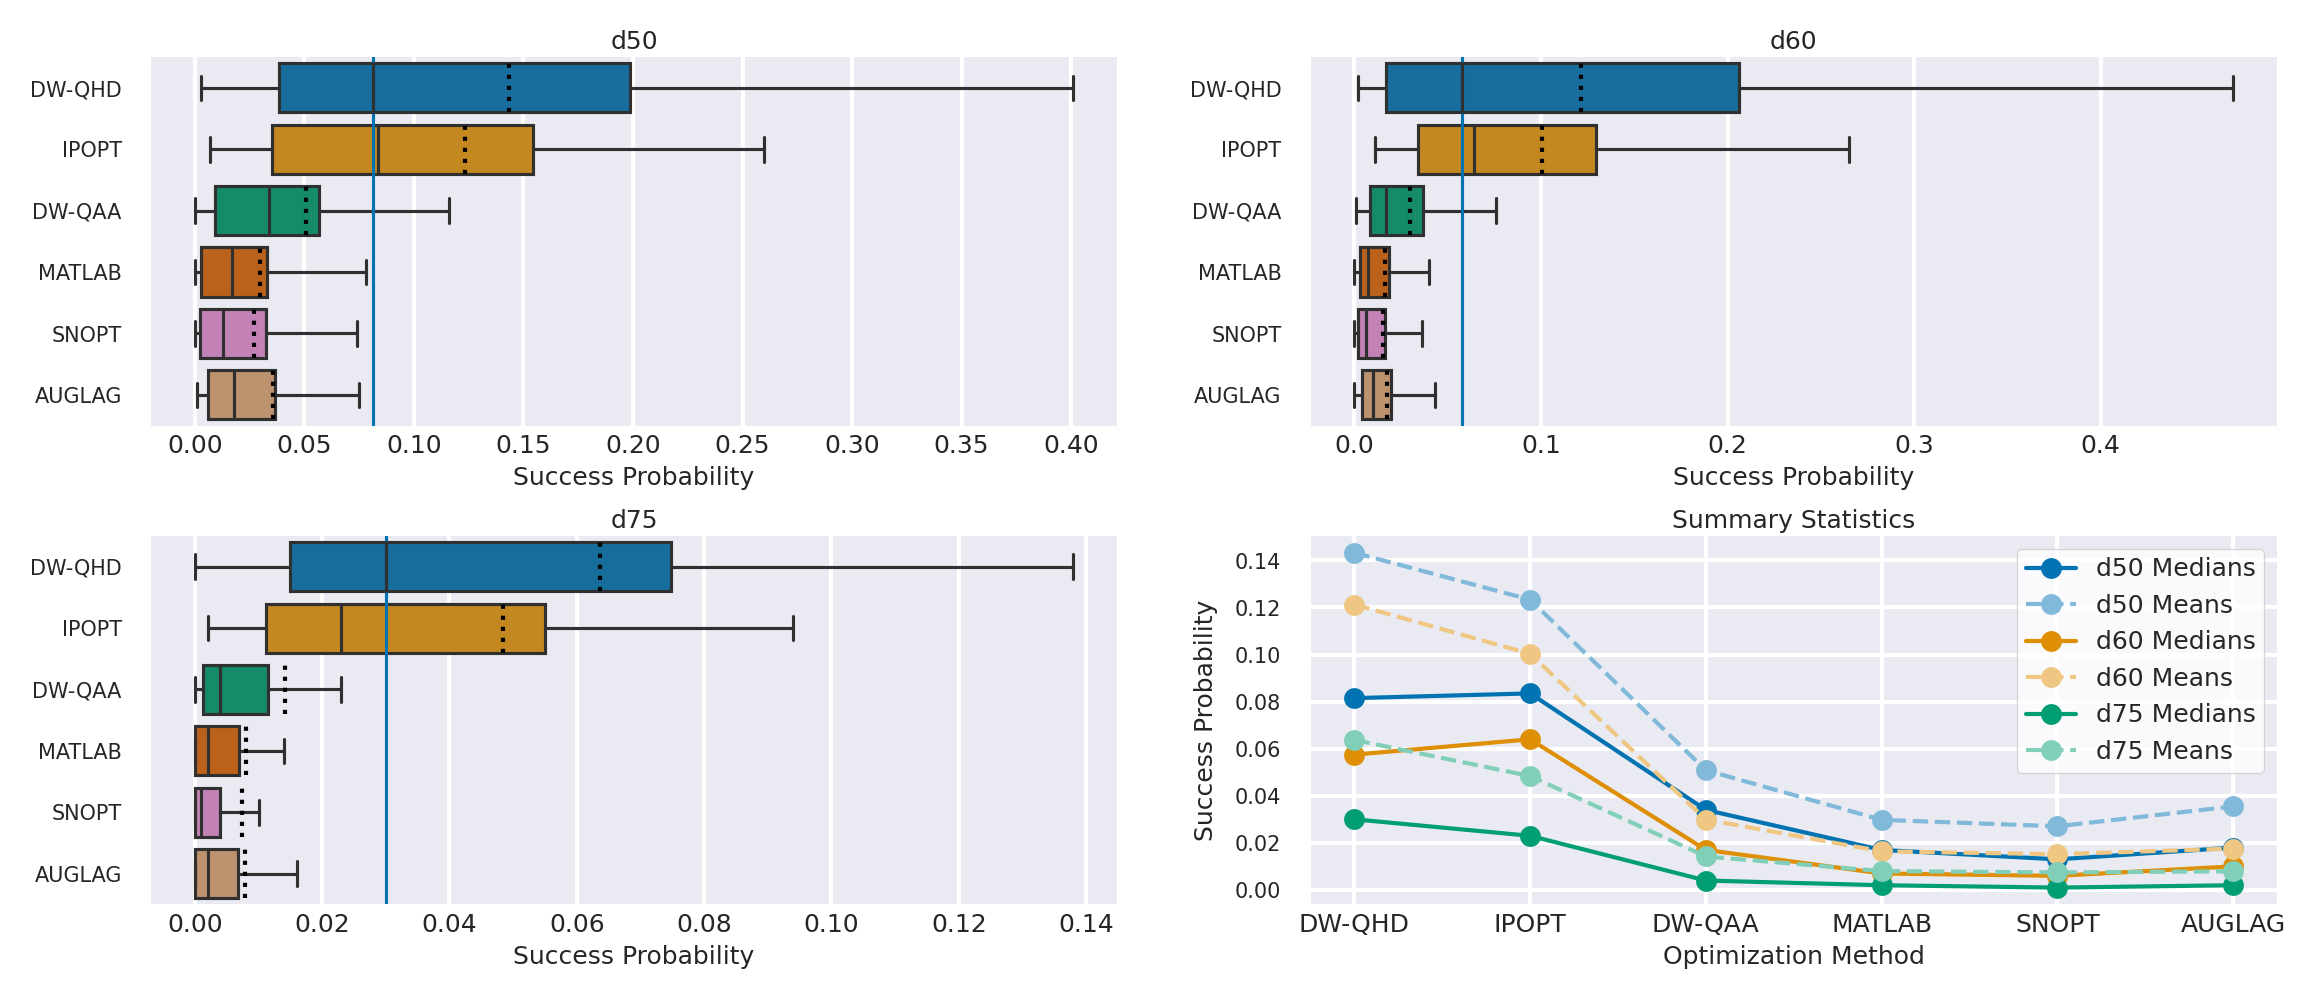

In [20]:
s3_client = boto3.client('s3')
bucket = "amazon-braket-wugroup-us-east-1"
object_folder = "jiaqileng/qhd/figs/"

SHOULD_SAVE = True

SUPTITLE_SIZE = 7

XLABEL_SIZE = 6
XTICKLABEL_SIZE = 6

YLABEL_SIZE = 6
YTICKLABEL_SIZE = 5

# Box plot
BOX_WIDTH = 0.8
FLIER_SIZE = 2
LINEWIDTH = 0.75

# Stats plot
MARKER_SIZE = 5
LEGEND_SIZE = 6

means = {}
medians = {}
errs = {}

f, ax = plt.subplots(2, 2, figsize=(180/25.4, 95/25.4), dpi=300)
# f, ax = plt.subplots(2, 2, figsize=(180/25.4, 135/25.4), dpi=300)
# plt.subplots_adjust(left=0.0, right=1.0, hspace=0.1)
plt.subplots_adjust(left=0.0, right=1.0, hspace=0.3)

cmap = sns.color_palette("colorblind")

DIMS = [50, 60, 75]
plot_assignment = {50: (0, 0), 60: (0, 1), 75: (1, 0), "stats": (1, 1)}

for dim_idx in range(len(DIMS)):
    dim = DIMS[dim_idx]
    if dim_idx == 1:
        benchmark_name = f"QP-{dim}d-5s-alt"
    else:
        benchmark_name = f"QP-{dim}d-5s"

    tab_prob = pd.DataFrame(
        {
            "DW-QHD": np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qhd_rez8_success_prob.npy")),
            "IPOPT": np.load(os.path.join("instances", benchmark_name, f"ipopt_success_prob.npy")),
            "DW-QAA": np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleB_rez8_success_prob.npy")),
            "MATLAB": np.load(os.path.join("instances", benchmark_name, f"matlab_sqp_success_prob.npy")),
            "SNOPT": np.load(os.path.join("instances", benchmark_name, f"snopt_success_prob.npy")),
            "AUGLAG": np.load(os.path.join("instances", benchmark_name, f"auglag_success_prob.npy")),
        }
    )

    sns.boxplot(ax=ax[plot_assignment[dim]], orient="h", data=tab_prob, palette="colorblind", showfliers=False, fliersize=FLIER_SIZE, linewidth=LINEWIDTH)
    
    means[dim] = []
    medians[dim] = []
    errs[dim] = np.ndarray((2, len(tab_prob.columns)))
    
    for col_idx in range(len(tab_prob.columns)):
        col = tab_prob.columns[col_idx]    
        
        col_mean = np.mean(tab_prob[col])
        means[dim].append(col_mean)
        
        box_top = len(tab_prob.columns)-col_idx
        box_center = (len(tab_prob.columns)-col_idx - 0.5)/len(tab_prob.columns)
        box_width = 8/60
        ax[plot_assignment[dim]].axvline(x=col_mean, ymin=(box_center-box_width/2), ymax=(box_center+box_width/2), linestyle=":", color="k", linewidth=1)
        
        medians[dim].append(np.median(tab_prob[col]))
        errs[dim][:, col_idx] = np.abs(np.quantile(tab_prob[col], [0.25, 0.75]).T - medians[dim][-1])
        
    ax[plot_assignment[dim]].axvline(medians[dim][0], linewidth=LINEWIDTH, color=cmap[0])
    
    ax[(0, 0)].set_title("d50", size=XLABEL_SIZE, pad=2)
    ax[(0, 1)].set_title("d60", size=XLABEL_SIZE, pad=2)
    ax[(1, 0)].set_title("d75", size=XLABEL_SIZE, pad=2)
    ax[(1, 1)].set_title("Summary Statistics", size=XLABEL_SIZE, pad=2)

    ax[(0, 0)].xaxis.set_tick_params(pad=2)
    ax[(0, 1)].xaxis.set_tick_params(pad=2)
    ax[(1, 0)].xaxis.set_tick_params(pad=2)
    ax[(1, 1)].xaxis.set_tick_params(pad=2)

    ax[(0, 0)].set_xlabel("Success Probability", size=XLABEL_SIZE)
    ax[(0, 1)].set_xlabel("Success Probability", size=XLABEL_SIZE)
    ax[(1, 0)].set_xlabel("Success Probability", size=XLABEL_SIZE)
    ax[(1, 1)].set_xlabel("Optimization Method", size=XLABEL_SIZE)
    
    ax[(0, 0)].xaxis.labelpad = 2
    ax[(0, 1)].xaxis.labelpad = 2
    ax[(1, 0)].xaxis.labelpad = 2
    ax[(1, 1)].xaxis.labelpad = 2

i = 0
for dim in [50, 60, 75]:
    color = cmap[i]
    paired_color = tuple([(channel + 0.5*(1-channel)) for channel in color])

    ax[plot_assignment["stats"]].errorbar(x=np.arange(len(medians[dim])), y=medians[dim], label=f"d{dim} Medians", marker="o", markersize=MARKER_SIZE, linestyle="-", linewidth=1, color=color)
    ax[plot_assignment["stats"]].errorbar(x=np.arange(len(means[dim])), y=means[dim], label=f"d{dim} Means", marker="o", markersize=MARKER_SIZE, linestyle="--", linewidth=1,  color=paired_color)
    i += 1

ax[plot_assignment["stats"]].set_xticks(range(6), tab_prob.columns)


for key in plot_assignment.keys():
    ax[plot_assignment[key]].tick_params(axis='x', which='major', labelsize=XTICKLABEL_SIZE)
    ax[plot_assignment[key]].tick_params(axis='y', which='major', labelsize=YTICKLABEL_SIZE)

ax[plot_assignment["stats"]].legend(bbox_to_anchor=(1, 1), frameon=True, facecolor="white", borderpad=0.35, prop={'size': LEGEND_SIZE})
ax[plot_assignment["stats"]].set_ylabel("Success Probability", size=YLABEL_SIZE)


if SHOULD_SAVE:
    fname = f"QPMegaplotThin"
    for ext in [".png", ".eps"]:
        plt.savefig(fname+ext, bbox_inches='tight')
        s3_client.upload_file(fname+ext, bucket, object_folder+fname+ext)

plt.show()
    

### Average Objective Value

In [11]:
benchmark_name = "QP-50d-5s"
# benchmark_name = "QP-60d-5s"
# benchmark_name = "QP-75d-5s"

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

def min_values(data):
    extrema = data != data.min()
    bolded = data.apply(lambda x : f"\cellcolor[HTML]{{EEEEEE}} \\textbf{{{x:.3f}}}")
    formatted = data.apply(lambda x : f"{x:.3f}")
    return formatted.where(extrema, bolded)


tab_obj = pd.DataFrame(
    {
        "AL/GD": np.load(os.path.join("instances", benchmark_name, f"auglag_mean_obj.npy")),
        "IPOPT": np.load(os.path.join("instances", benchmark_name, f"ipopt_mean_obj.npy")),
        "SNOPT": np.load(os.path.join("instances", benchmark_name, f"snopt_mean_obj.npy")),
        "MATLAB": np.load(os.path.join("instances", benchmark_name, f"matlab_sqp_mean_obj.npy")),
        "DW-QAA": np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qaa_scheduleB_rez8_mean_obj.npy")),
        "DW-QHD": np.load(os.path.join("instances", benchmark_name, f"post_advantage6_qhd_rez8_mean_obj.npy")),
    }
)

tab_obj.style.apply(highlight_min, props='font-weight:bold', axis=1)
print(tab_obj.apply(lambda data : min_values(data),axis=1).to_latex(column_format='c|ccccccc', escape=False))


\begin{tabular}{c|ccccccc}
\toprule
{} &   AL/GD &                                     IPOPT &   SNOPT &  MATLAB &     QAA &                                       QHD \\
\midrule
0  &  -0.776 &                                    -1.040 &  -0.786 &  -0.803 &  -0.849 &  \cellcolor[HTML]{EEEEEE} \textbf{-1.063} \\
1  &  -2.012 &                                    -2.399 &  -1.954 &  -1.985 &  -2.218 &  \cellcolor[HTML]{EEEEEE} \textbf{-2.538} \\
2  &  -0.151 &                                    -0.398 &  -0.175 &  -0.193 &  -0.299 &  \cellcolor[HTML]{EEEEEE} \textbf{-0.455} \\
3  &  -1.231 &                                    -1.436 &  -1.212 &  -1.212 &  -1.311 &  \cellcolor[HTML]{EEEEEE} \textbf{-1.479} \\
4  &  -1.635 &  \cellcolor[HTML]{EEEEEE} \textbf{-1.835} &  -1.610 &  -1.629 &  -1.698 &                                    -1.817 \\
5  &  -0.453 &                                    -0.506 &  -0.476 &  -0.485 &  -0.485 &  \cellcolor[HTML]{EEEEEE} \textbf{-0.562} \\
6  &  -2.864 &   

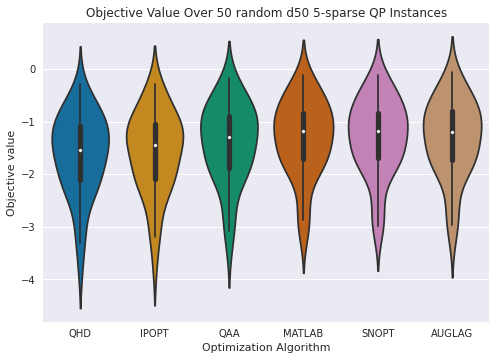

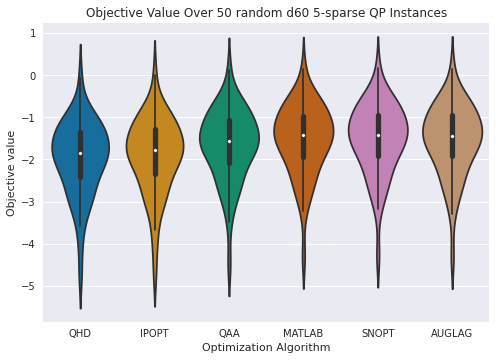

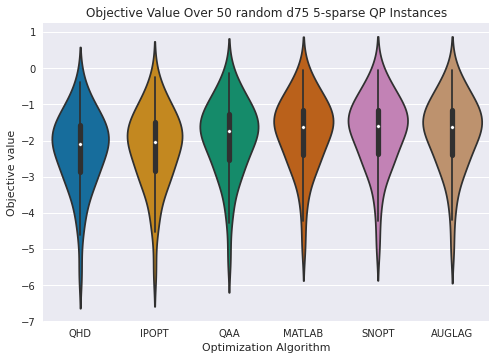

In [127]:
for dim in [50, 60, 75]:
    benchmark_name = f"QP-{dim}d-5s"

    tab_obj = pd.DataFrame(
        {
            "QHD": np.load(os.path.join("instances", benchmark_name, f"post_qhd_rez8_mean_obj.npy")),
            "IPOPT": np.load(os.path.join("instances", benchmark_name, f"ipopt_mean_obj.npy")),
            "QAA": np.load(os.path.join("instances", benchmark_name, f"post_qaa_scheduleA_rez8_mean_obj.npy")),
            "MATLAB": np.load(os.path.join("instances", benchmark_name, f"matlab_sqp_mean_obj.npy")),
            "SNOPT": np.load(os.path.join("instances", benchmark_name, f"snopt_mean_obj.npy")),
            "AUGLAG": np.load(os.path.join("instances", benchmark_name, f"auglag_mean_obj.npy")),
        }
    )

#     sns.boxplot(data=tab_obj, palette="colorblind")
    sns.violinplot(data=tab_obj, palette="colorblind")
    
    plt.title(f"Objective Value Over 50 random d{dim} 5-sparse QP Instances")
    plt.xlabel("Optimization Algorithm")
    plt.ylabel("Objective value")
    
    plt.xticks(range(6), tab_obj.columns)
    
    plt.show()

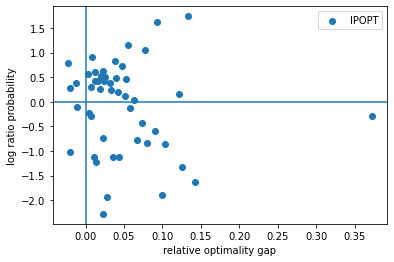

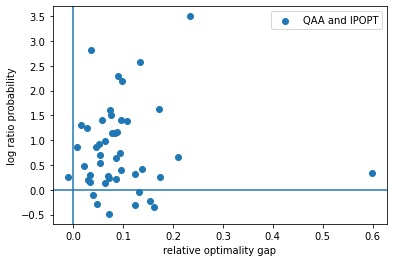

In [23]:
benchmark_name = "QP-75d-5s"
    
tab_obj = pd.DataFrame(
    {
        "IPOPT": np.load(os.path.join("instances", benchmark_name, f"ipopt_mean_obj.npy")),
        "SNOPT": np.load(os.path.join("instances", benchmark_name, f"snopt_mean_obj.npy")),
        "MATLAB": np.load(os.path.join("instances", benchmark_name, f"matlab_sqp_mean_obj.npy")),
        "AUGLAG": np.load(os.path.join("instances", benchmark_name, f"auglag_mean_obj.npy")),
        "QAA": np.load(os.path.join("instances", benchmark_name, f"post_qaa_scheduleA_rez8_mean_obj.npy")),
        "QHD": np.load(os.path.join("instances", benchmark_name, f"post_qhd_rez8_mean_obj.npy")),
    }
)

xdata = (tab_obj["IPOPT"] - tab_obj["QHD"]) / np.abs(tab_obj["QHD"])
ydata = np.log(tab_prob["QHD"] / tab_prob["IPOPT"])

x2data = (tab_obj["MATLAB"] - tab_obj["QHD"]) / np.abs(tab_obj["QHD"])
y2data = np.log(tab_prob["QHD"] / tab_prob["MATLAB"])

x3data = (tab_obj["QAA"] - tab_obj["QHD"]) / np.abs(tab_obj["QHD"])
y3data = np.log(tab_prob["QHD"] / tab_prob["QAA"])

plt.scatter(xdata, ydata, label="IPOPT")
# plt.scatter(x2data, y2data, label="MATLAB")
# plt.scatter(x3data, y3data, label="QAA")
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.xlabel("relative optimality gap")
plt.ylabel("log ratio probability")
plt.show()


xdata = (tab_obj["MATLAB"] - tab_obj["QAA"]) / np.abs(tab_obj["QAA"])
ydata = np.log(tab_prob["QAA"] / tab_prob["MATLAB"])

plt.scatter(xdata, ydata, label="QAA and IPOPT")
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.xlabel("relative optimality gap")
plt.ylabel("log ratio probability")
plt.show()

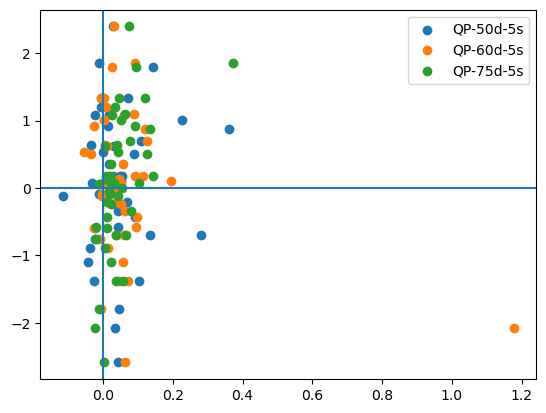

In [208]:
# optimality gap in E: (####-QHD) / QHD
# log ratio in P = ln(QHD / IPOPT)


benchmark_name = ["QP-50d-5s", "QP-60d-5s", "QP-75d-5s"]

for bn in benchmark_name:
    tab_obj = pd.DataFrame(
        {
            "IPOPT": np.load(os.path.join("instances", bn, f"ipopt_mean_obj.npy")),
            "QHD": np.load(os.path.join("instances", bn, f"post_qhd_rez8_mean_obj.npy")),
        }
    )

    xdata = (tab_obj["IPOPT"] - tab_obj["QHD"]) / np.abs(tab_obj["QHD"])
    ydata = np.log(tab_prob["QHD"] / tab_prob["IPOPT"])


    plt.scatter(xdata, ydata, label=f"{bn}")
    
plt.axhline(0)
plt.axvline(0)
plt.legend()
plt.show()


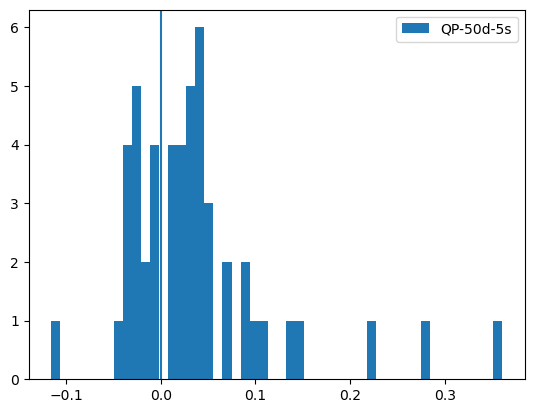

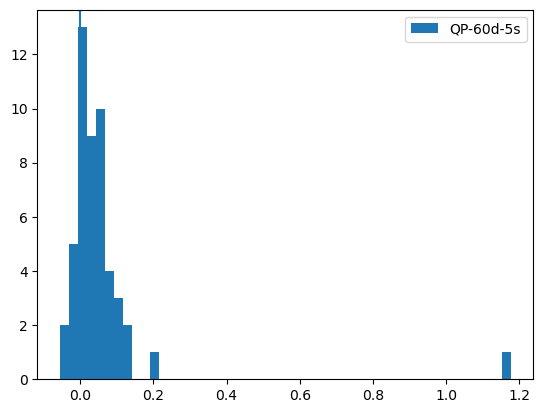

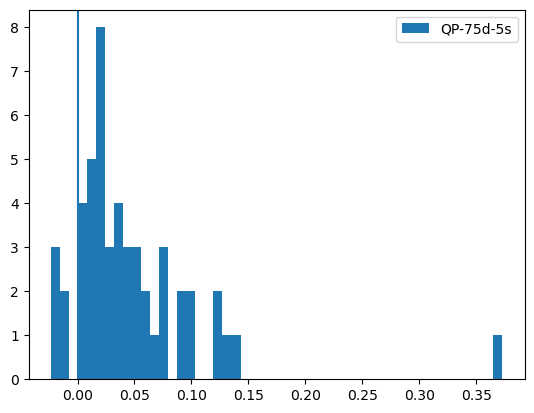

In [216]:
# optimality gap in E: (####-QHD) / QHD


benchmark_name = ["QP-50d-5s", "QP-60d-5s", "QP-75d-5s"]

for bn in benchmark_name:
    tab_obj = pd.DataFrame(
        {
            "IPOPT": np.load(os.path.join("instances", bn, f"ipopt_mean_obj.npy")),
            "QHD": np.load(os.path.join("instances", bn, f"post_qhd_rez8_mean_obj.npy")),
        }
    )

    xdata = (tab_obj["IPOPT"] - tab_obj["QHD"]) / np.abs(tab_obj["QHD"])

    plt.hist(xdata, bins=50, label=f"{bn}", alpha=1)
    plt.axvline(0)
    plt.legend()
    plt.show()
    



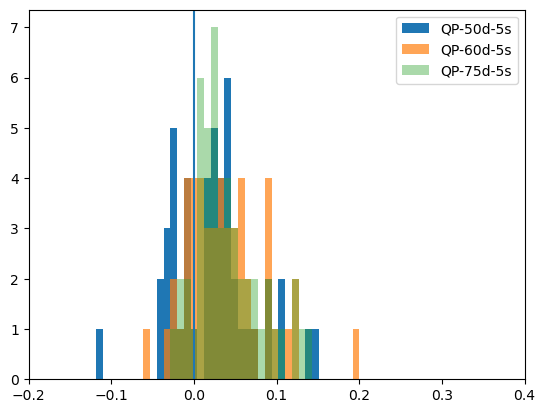

In [267]:
# optimality gap in E: (####-QHD) / QHD


benchmark_name = ["QP-50d-5s", "QP-60d-5s", "QP-75d-5s"]

bins = np.linspace(-0.2,  0.2, 50)

alphas = [1, 0.7, 0.4]

for idx in range(3):
    bn = benchmark_name[idx]
    tab_obj = pd.DataFrame(
        {
            "IPOPT": np.load(os.path.join("instances", bn, f"ipopt_mean_obj.npy")),
            "QHD": np.load(os.path.join("instances", bn, f"post_qhd_rez8_mean_obj.npy")),
        }
    )

    xdata = (tab_obj["IPOPT"] - tab_obj["QHD"]) / np.abs(tab_obj["QHD"])

    plt.hist(xdata, bins=bins, cumulative=0, label=f"{bn}", alpha=alphas[idx])

plt.axvline(0)
plt.legend()
plt.xlim([-0.2, 0.4])
plt.show()

In [227]:
from scipy import stats

In [249]:
tab_obj = pd.DataFrame(
        {
            "IPOPT": np.load(os.path.join("instances", bn, f"ipopt_mean_obj.npy")),
            "QHD": np.load(os.path.join("instances", bn, f"post_qhd_rez8_mean_obj.npy")),
        }
    )

print(stats.describe((tab_obj["IPOPT"] - tab_obj["QHD"]) / np.abs(tab_obj["QHD"])))

DescribeResult(nobs=50, minmax=(-0.02314417449041859, 0.3727058679088821), mean=0.04771396342763284, variance=0.0038449744395398617, skewness=3.0362833737339625, kurtosis=13.19768237003598)


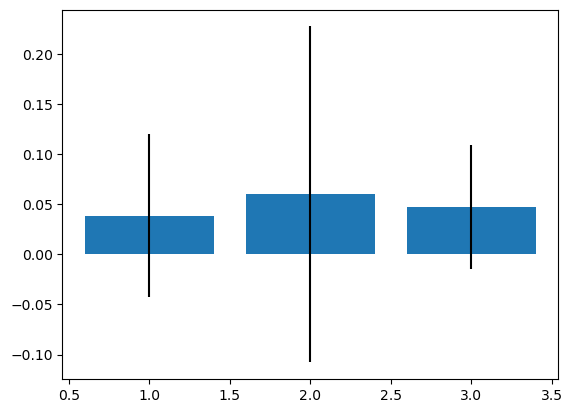

In [250]:
# optimality gap in E: (####-QHD) / QHD


benchmark_name = ["QP-50d-5s", "QP-60d-5s", "QP-75d-5s"]

descs = []

for bn in benchmark_name:
    tab_obj = pd.DataFrame(
        {
            "IPOPT": np.load(os.path.join("instances", bn, f"ipopt_mean_obj.npy")),
            "QHD": np.load(os.path.join("instances", bn, f"post_qhd_rez8_mean_obj.npy")),
        }
    )
    
    data = (tab_obj["IPOPT"] - tab_obj["QHD"]) / np.abs(tab_obj["QHD"])
    
    descs.append(stats.describe(data))

# print
plt.bar([1, 2, 3], height=[d.mean for d in descs], yerr=[np.sqrt(d.variance) for d in descs])
plt.set_xticks = [1, 2, 3]
plt.set_xticklabels = ["50", "60", "75"]
plt.show()